In [34]:
"""
------------------------------------------------------------------------------
About
The geojson file of the admin areas is used to get the geojson and svg geometry 
of each individual admin area.
------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nAbout\nThe geojson file of the admin areas is used to get the geojson and svg geometry \nof each individual admin area.\n------------------------------------------------------------------------------\n'

In [35]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

import os

In [36]:
"""
------------------------------------------------------------------------------
Import data
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

In [37]:
admin_areas.head()

,id,pgr_id,pgr_name,bez,finhalt,stand,geometry
0,c_lor_pgr_2021.0370,0370,Südlicher Prenzlauer Berg,03 - Pankow,3.031117e+06,01.01.2021,"MULTIPOLYGON (((13.41975 52.52555, 13.42016 52..."
1,c_lor_pgr_2021.0220,0220,Kreuzberg Süd,02 - Friedrichshain-Kreuzberg,4.746309e+06,01.01.2021,"MULTIPOLYGON (((13.40772 52.48875, 13.40789 52..."
2,c_lor_pgr_2021.0760,0760,Marienfelde / Lichtenrade,07 - Tempelhof-Schöneberg,1.919254e+07,01.01.2021,"MULTIPOLYGON (((13.35912 52.4199, 13.35902 52...."
3,c_lor_pgr_2021.0520,0520,Wilhelmstadt / Staaken,05 - Spandau,2.301526e+07,01.01.2021,"MULTIPOLYGON (((13.15724 52.50162, 13.15726 52..."
4,c_lor_pgr_2021.0330,0330,Nördliches Weißensee,03 - Pankow,2.222540e+07,01.12.2021,"MULTIPOLYGON (((13.43357 52.58232, 13.43362 52..."


In [38]:
#number of unique admin areas
len(admin_areas["pgr_name"].unique())

58

In [39]:
"""
------------------------------------------------------------------------------
Create Prognoseraum folders
------------------------------------------------------------------------------
"""
#remove blank spaces and special characters
admin_area = [name.replace(" ", "_").replace("/", "_").replace(";", "_") for name in admin_areas.get("pgr_name")]
folder = "../maps/prognoseraum/"

for i in admin_area:
    ordner_pfad = os.path.join(folder, i)

    if not os.path.exists(ordner_pfad):
        os.makedirs(ordner_pfad)
        print(f"Folder created: {ordner_pfad}")
    else:
        print(f"Folder already exists: {ordner_pfad}")

Folder already exists: ../maps/prognoseraum/Südlicher_Prenzlauer_Berg
Folder already exists: ../maps/prognoseraum/Kreuzberg_Süd
Folder already exists: ../maps/prognoseraum/Marienfelde___Lichtenrade
Folder already exists: ../maps/prognoseraum/Wilhelmstadt___Staaken
Folder already exists: ../maps/prognoseraum/Nördliches_Weißensee
Folder already exists: ../maps/prognoseraum/Tempelhof
Folder already exists: ../maps/prognoseraum/Lichtenberg_Nord
Folder already exists: ../maps/prognoseraum/Lichtenberg_Mitte
Folder already exists: ../maps/prognoseraum/Hellersdorf
Folder already exists: ../maps/prognoseraum/Buch
Folder already exists: ../maps/prognoseraum/Hohenschönhausen_Nord
Folder already exists: ../maps/prognoseraum/Kaulsdorf_Mahlsdorf
Folder already exists: ../maps/prognoseraum/Treptow-Köpenick_1
Folder already exists: ../maps/prognoseraum/Tegel
Folder already exists: ../maps/prognoseraum/Mariendorf
Folder already exists: ../maps/prognoseraum/Friedrichshain_Ost
Folder already exists: ../m

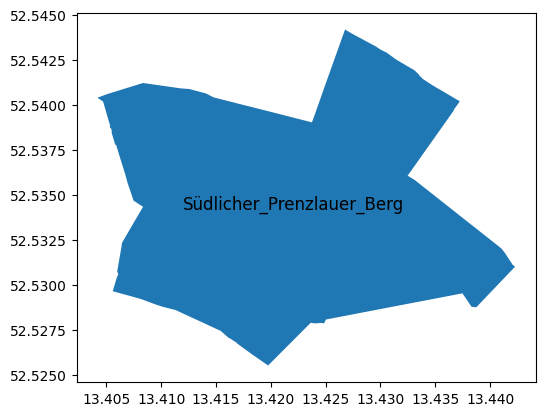

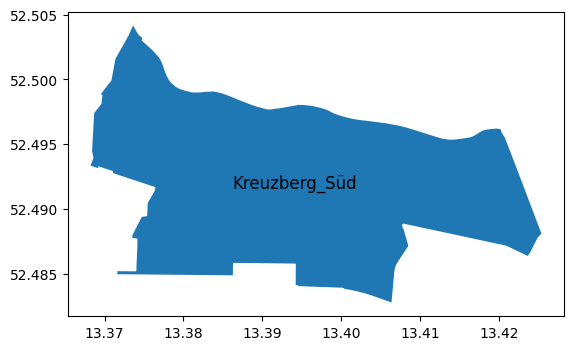

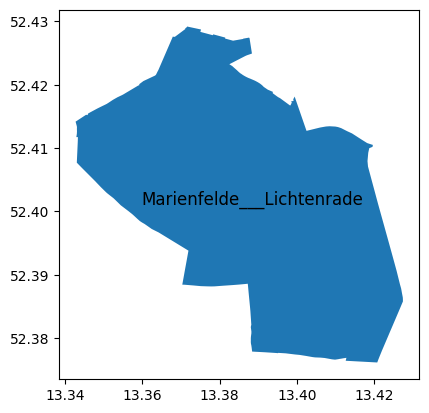

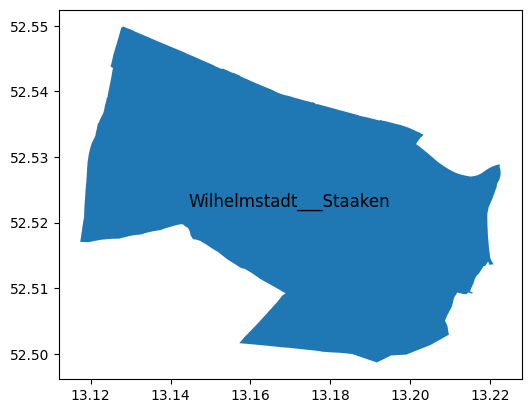

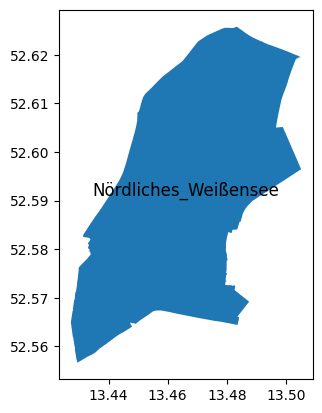

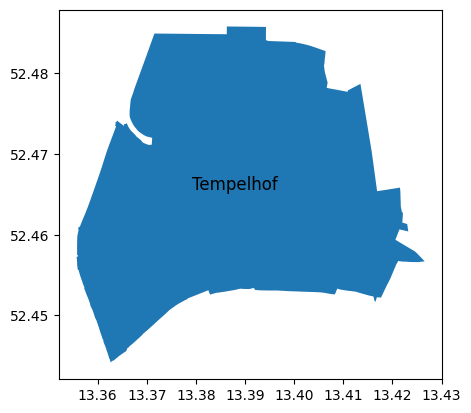

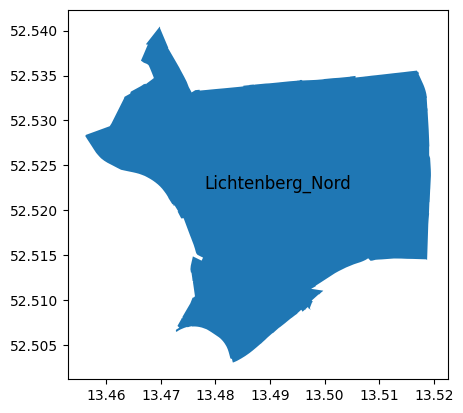

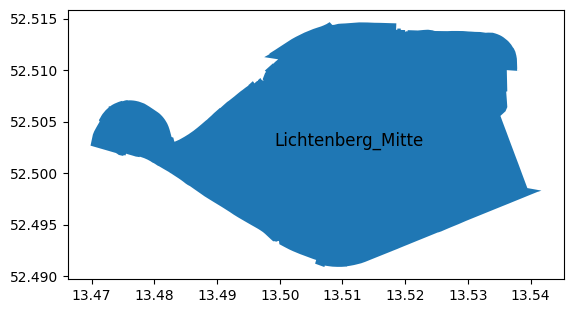

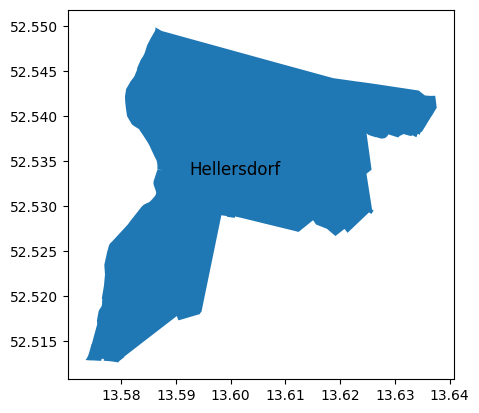

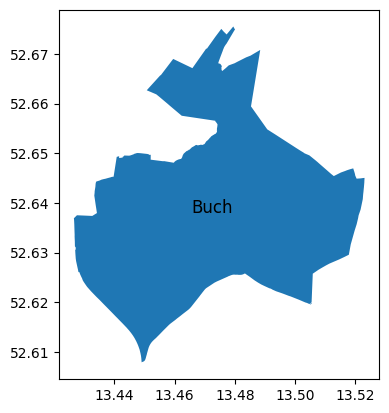

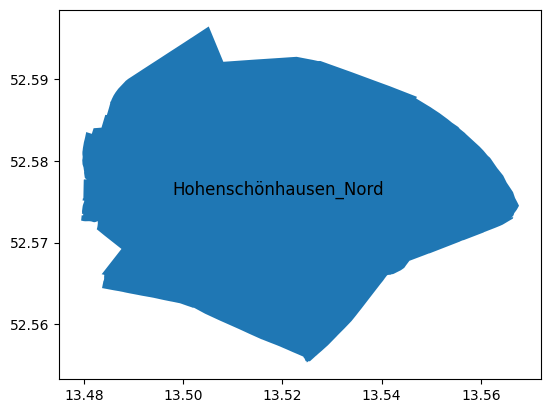

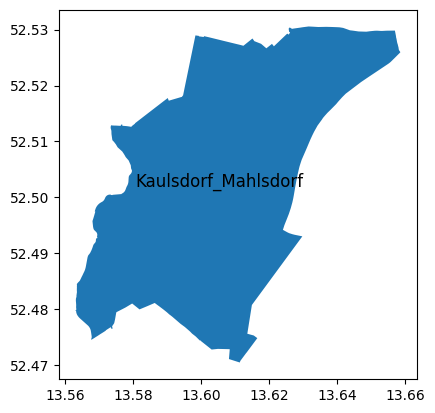

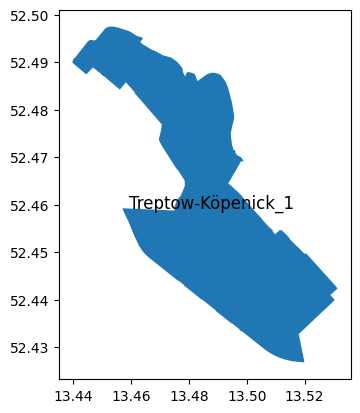

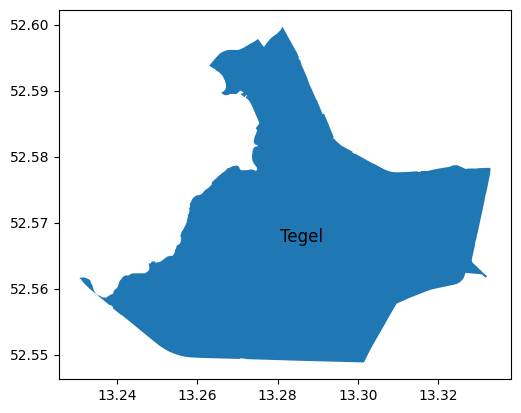

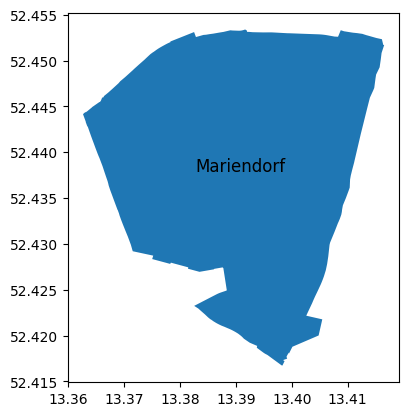

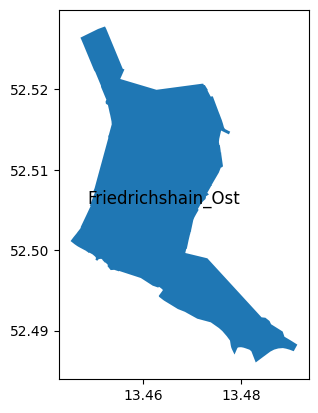

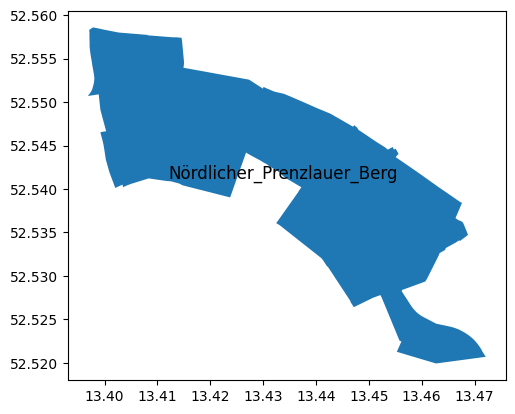

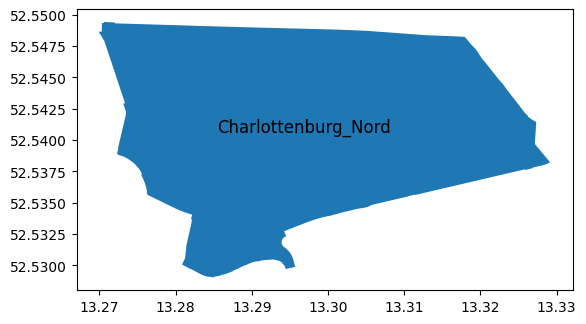

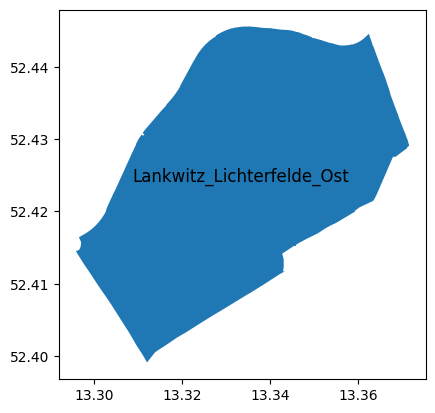

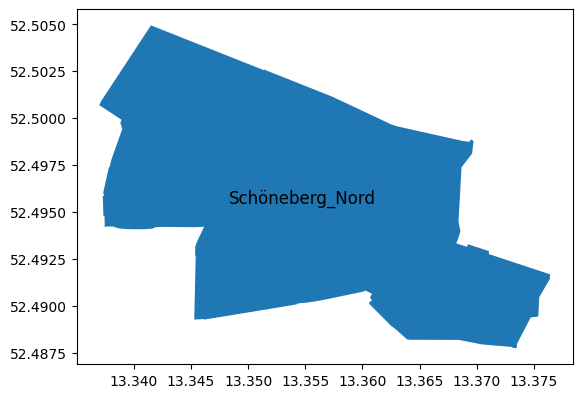

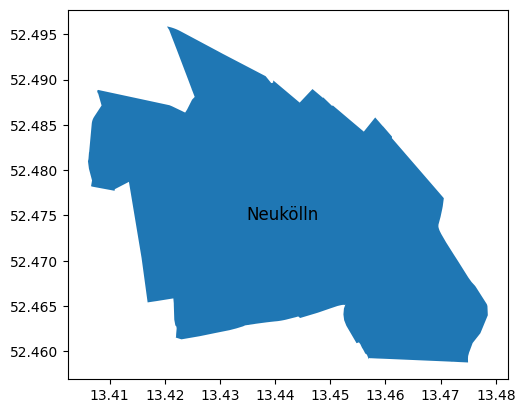

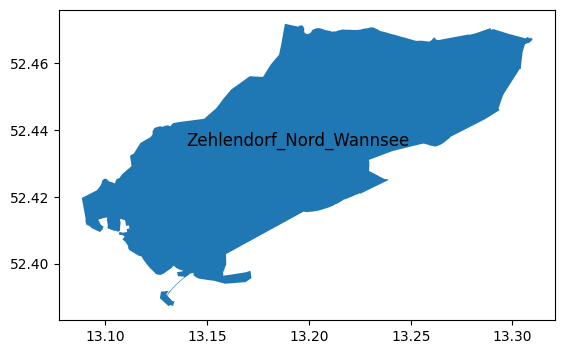

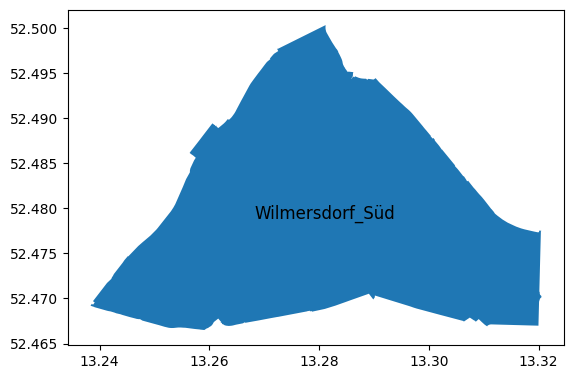

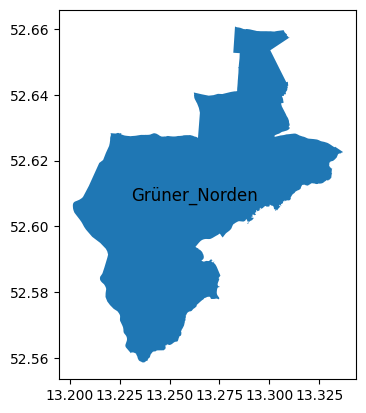

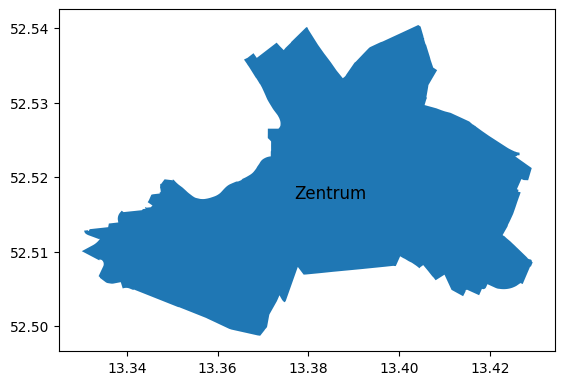

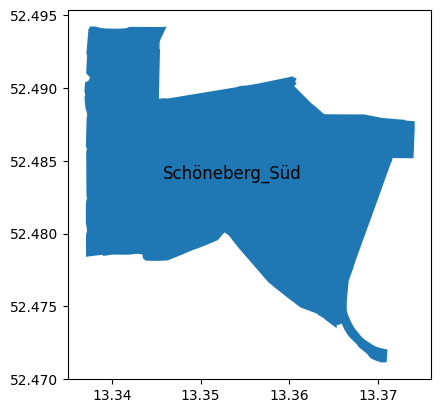

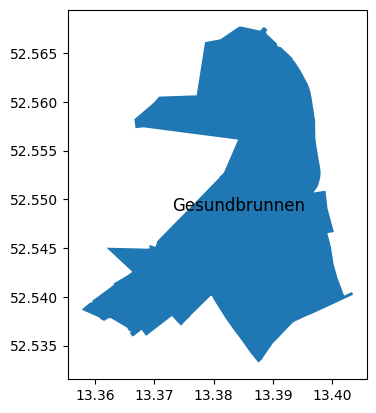

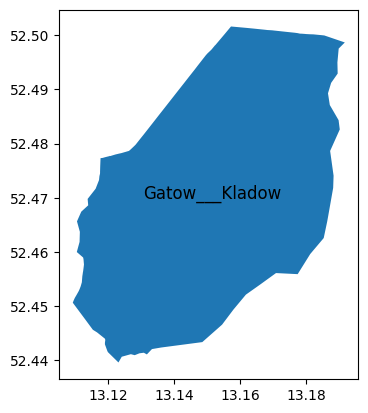

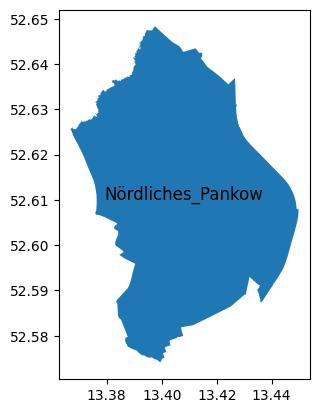

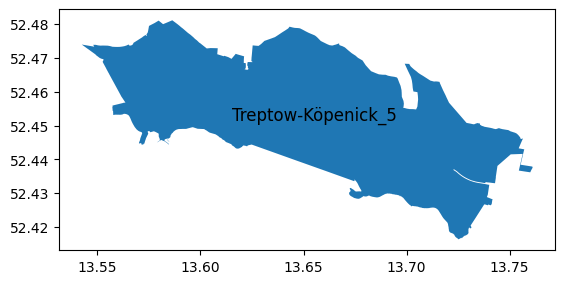

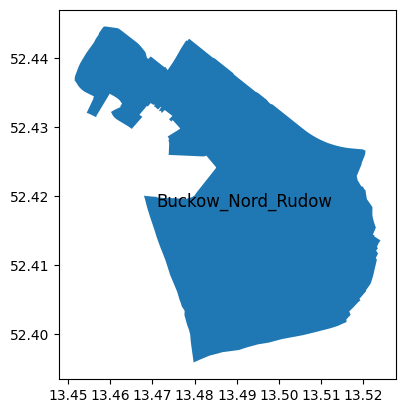

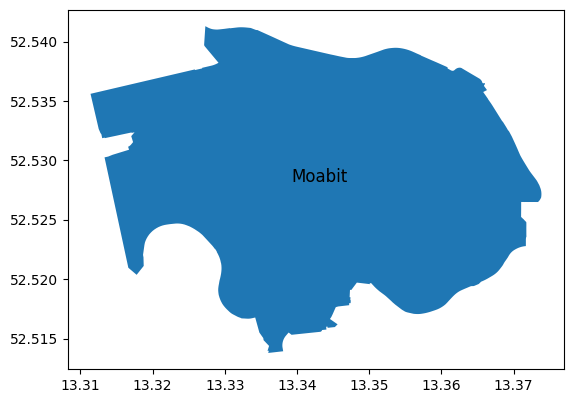

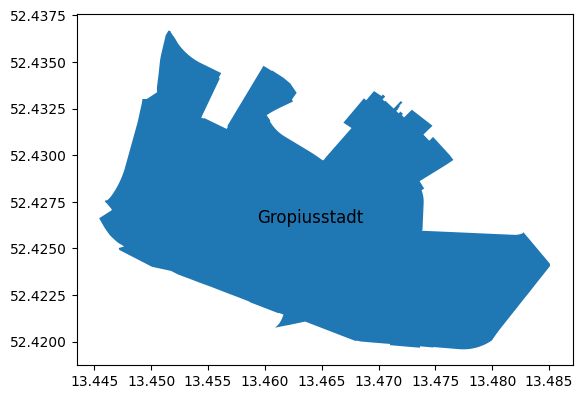

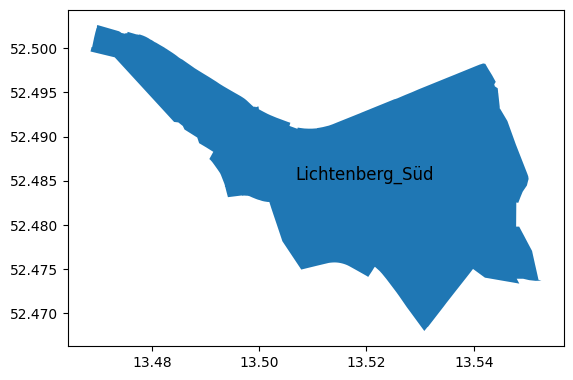

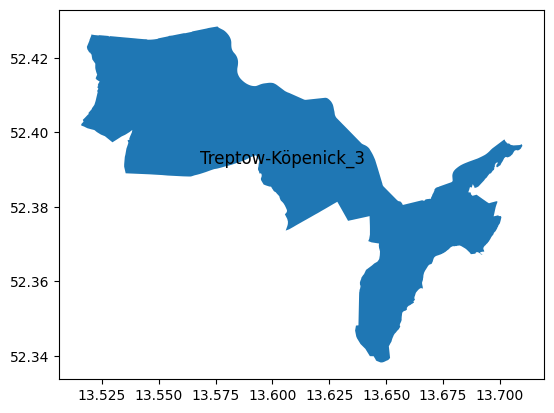

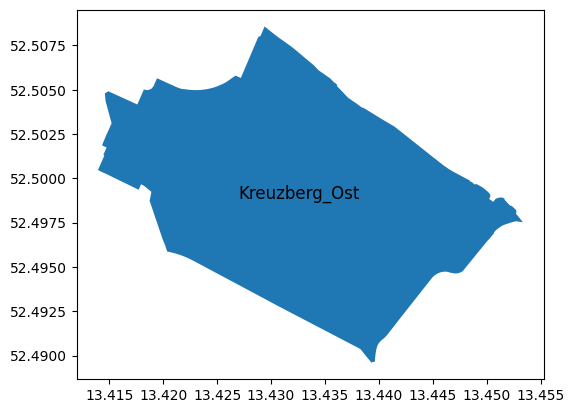

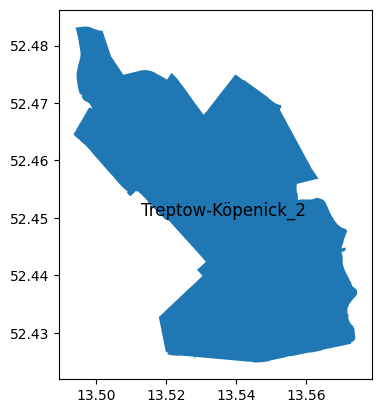

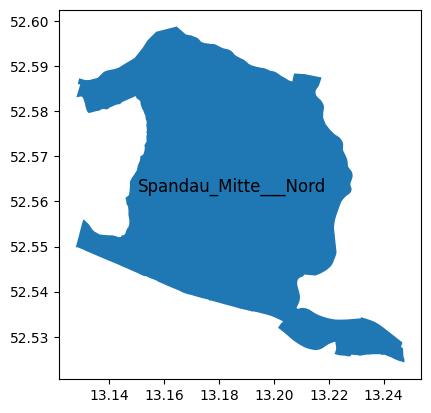

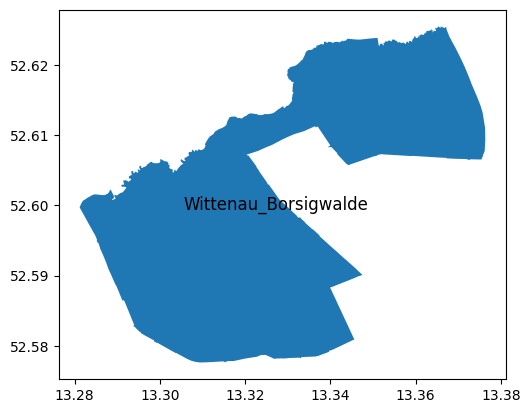

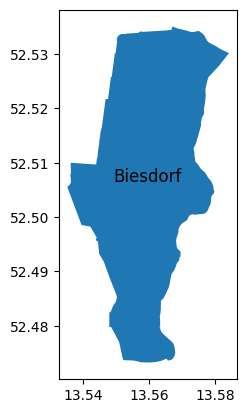

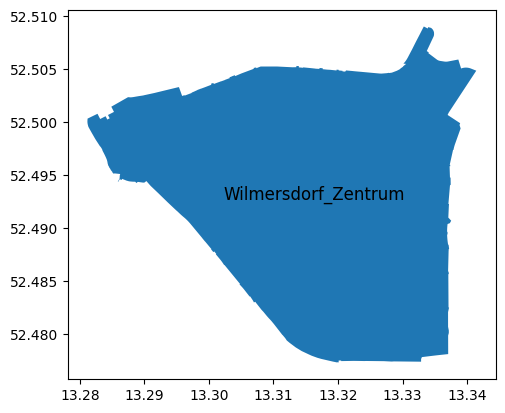

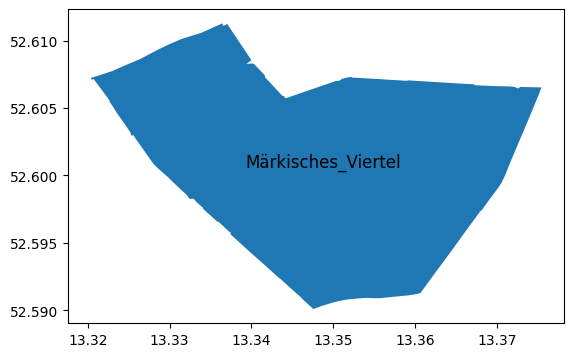

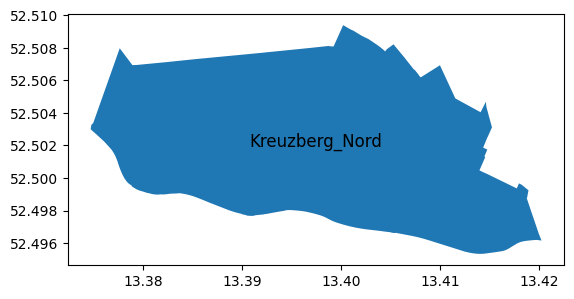

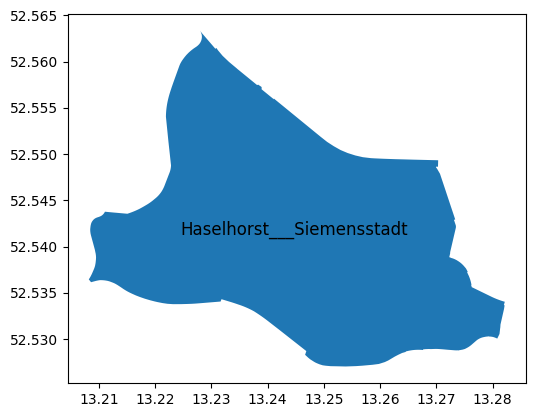

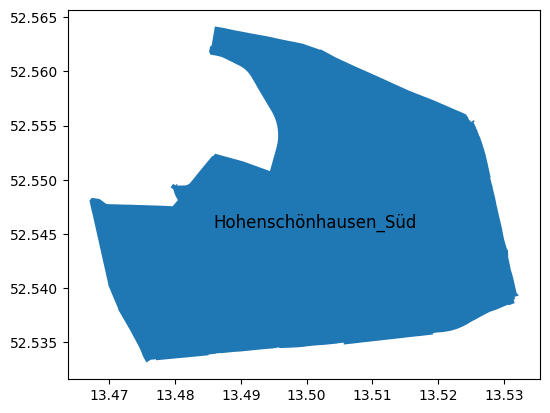

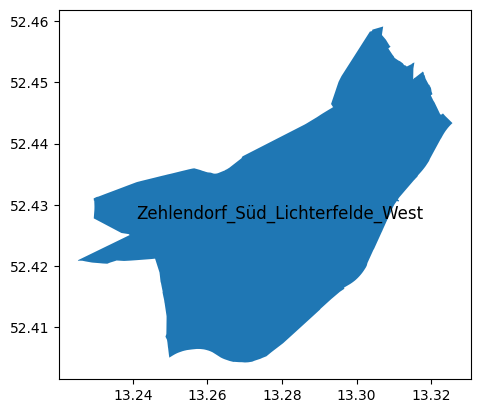

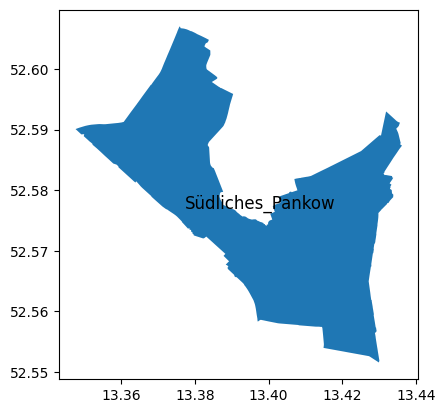

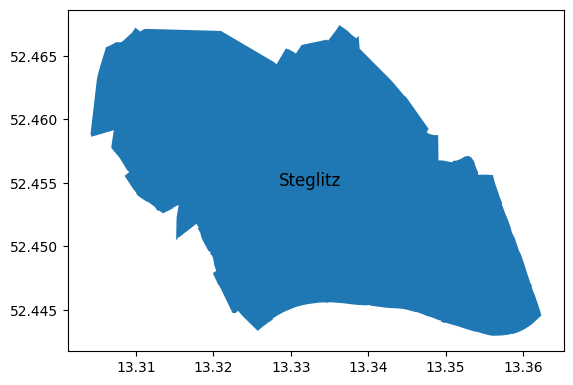

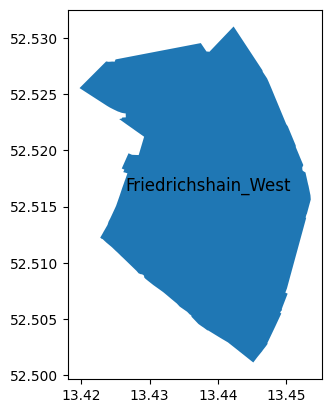

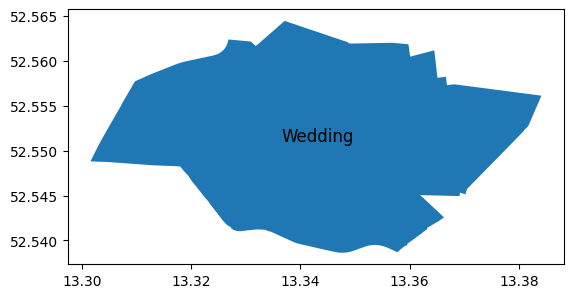

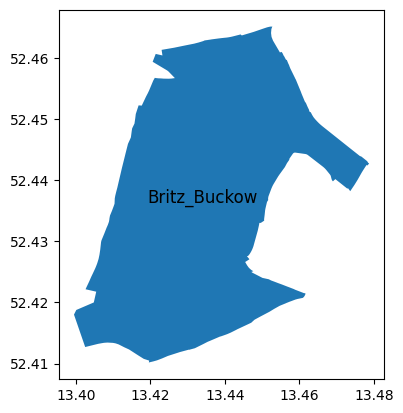

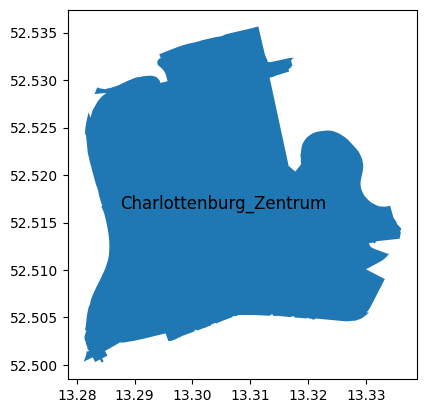

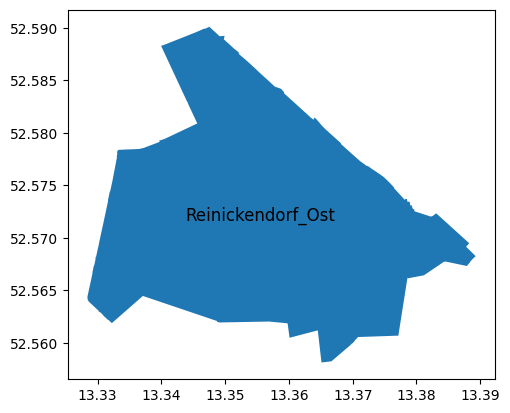

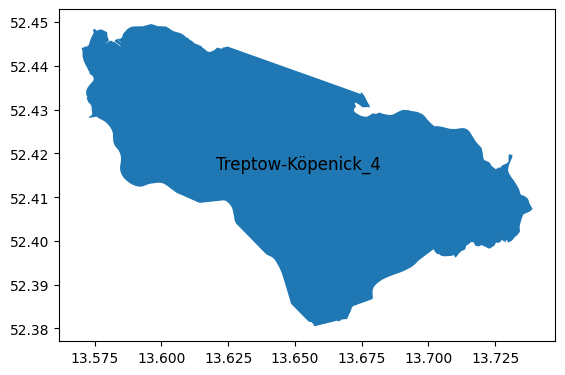

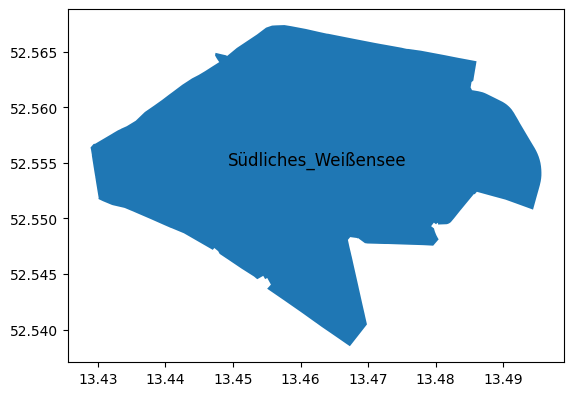

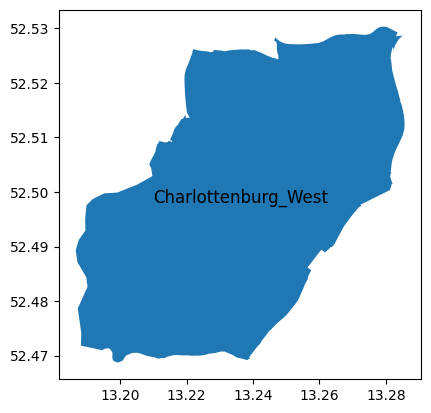

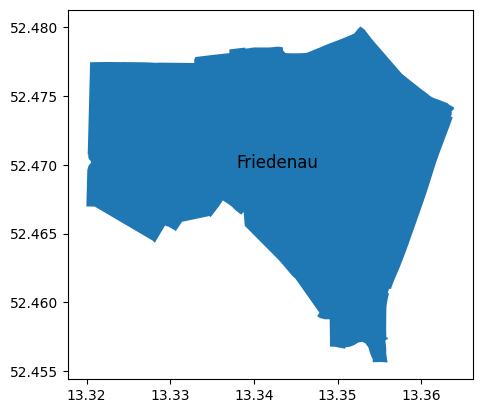

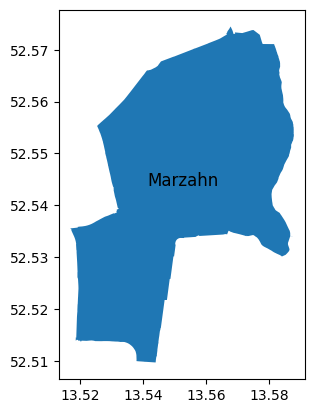

In [40]:

"""
------------------------------------------------------------------------------
Function admin area geometry
------------------------------------------------------------------------------
"""

def create_adminGeom(admin_area, admin_areas):

    
    Prognoseraum = admin_area.get("pgr_name").replace(" ", "_").replace("/", "_").replace(";", "_")
    
    admin_geometry = admin_area.geometry

    #check if geometry exists
    if admin_geometry is None or admin_geometry.is_empty:
        print(f"Invalid geometry for {Prognoseraum}")
        return
    
    #geo data frame
    gdf= gpd.GeoDataFrame({"geometry": [admin_geometry]}, crs="EPSG:4326")

    #save admin areas as geojson
    gdf.to_file(f"../maps/prognoseraum/{Prognoseraum}/{Prognoseraum}.geojson", driver="GeoJSON")

    #plot
    fig, ax = plt.subplots()
    gdf.plot(ax=ax)

    #add text
    centroid = admin_geometry.centroid
    ax.text(centroid.x, centroid.y, Prognoseraum, fontsize=12, ha="center", va="center")

    #svg
    fig.savefig(f"../maps/svg/{Prognoseraum}.svg", format="svg")

    plt.show()
    plt.close(fig) 



result = admin_areas.apply(
    lambda row: create_adminGeom(row, admin_areas), axis=1
)



